# 1.EDA Operation:

# i) To read and display the data present in .csv file in the form of a table:

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train=pd.read_csv("ai4i2020.csv")
train.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# ii) To check for NULL values in the table (True==NULL):

In [131]:
train.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# iii) To find the true values in the dataset:

<AxesSubplot:>

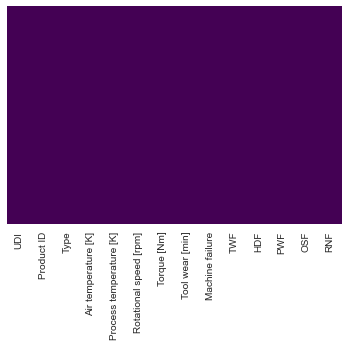

In [132]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# iv) Displaying data of one particular column:

<AxesSubplot:xlabel='Type', ylabel='count'>

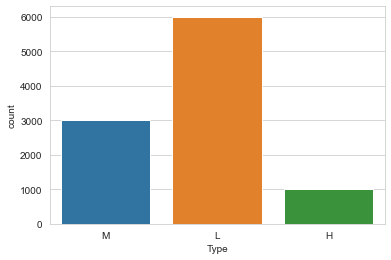

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Type',data=train)

# v) Displaying data of one column with respect to another:

<AxesSubplot:xlabel='Type', ylabel='count'>

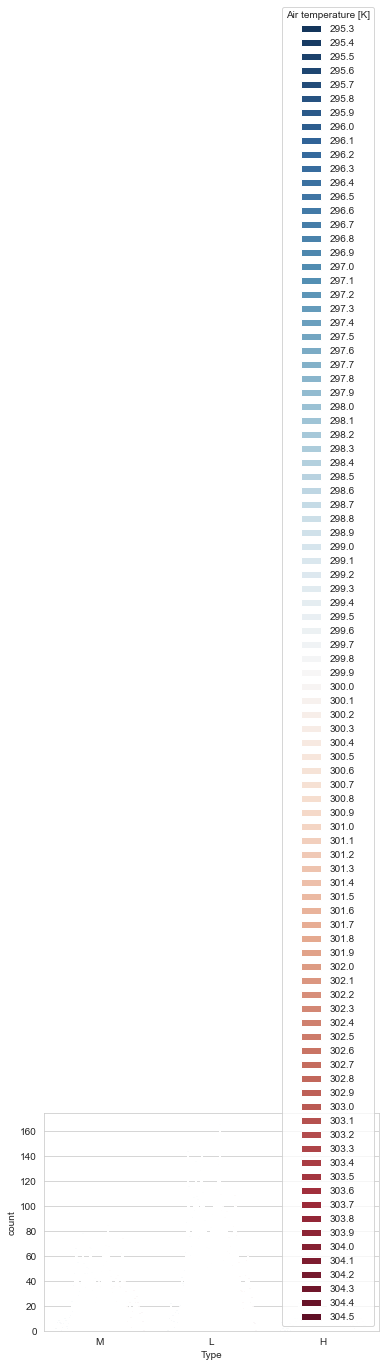

In [134]:
sns.countplot(x='Type',hue='Air temperature [K]',data=train,palette='RdBu_r')

# vi) Displaying column info in the form of a Histogram:

C:\Users\Sourabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Air temperature [K]'>

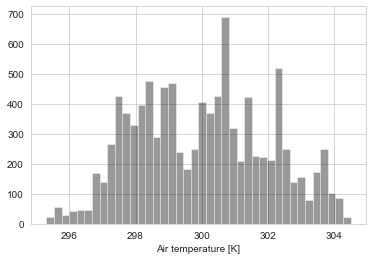

In [135]:
sns.distplot(train['Air temperature [K]'].dropna(),kde=False,color='black',bins=40)

<AxesSubplot:>

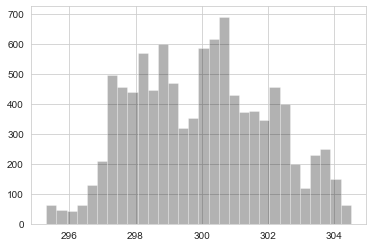

In [136]:
train['Air temperature [K]'].hist(bins=30,color='black',alpha=0.3)

<AxesSubplot:xlabel='Tool wear [min]', ylabel='count'>

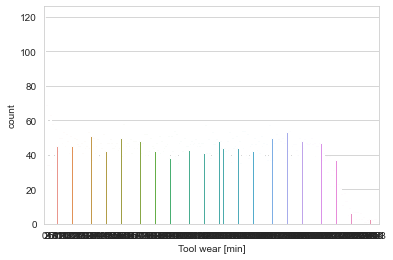

In [137]:
sns.countplot(x='Tool wear [min]',data=train)

<AxesSubplot:>

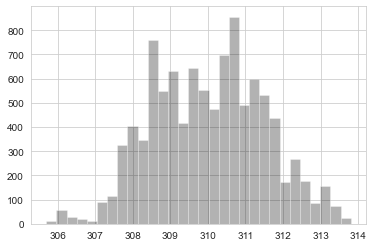

In [138]:
train['Process temperature [K]'].hist(bins=30,color='black',alpha=0.3)

# vi) Display of average data in two related columns using Boxplot:

<AxesSubplot:xlabel='Type', ylabel='Air temperature [K]'>

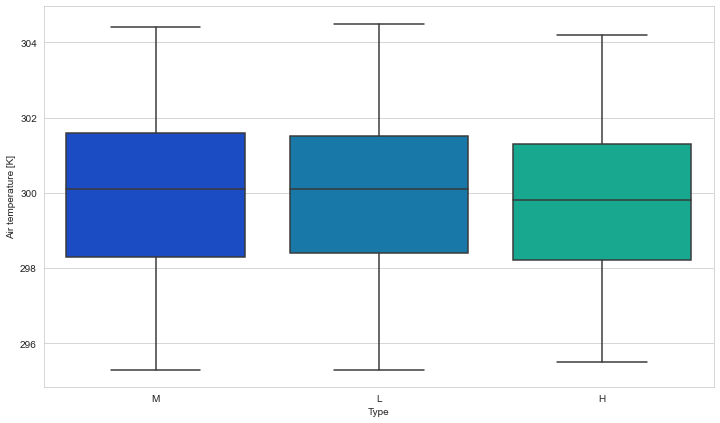

In [139]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Type',y='Air temperature [K]',data=train,palette='winter')

# vii) Data Cleaning(Removal of NULL values):

In [140]:
def impute(cols):
    air_temperature = cols[0]
    p_type = cols[1]
    print(p_type," - ",air_temperature)
    
    if pd.isnull(air_temperature):
        print(p_type," - ",air_temperature)
        if p_type == 'M':
            return 302
        elif p_type == 'L':
            return 301
        else:
            return 298
    else:
        return air_temperature

# *Before applying impute function:

In [141]:
train.loc[[9999],:]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9999,10000,M24859,M,NaN,308.7,1500,40.2,30,0,0,0,0,0,0


In [142]:
train['Air temperature [K]']=train[['Air temperature [K]','Type']].apply(impute,axis=1)
print(train['Air temperature [K]'])

M  -  298.1
L  -  298.2
L  -  298.1
L  -  298.2
L  -  298.2
M  -  298.1
L  -  298.1
L  -  298.1
M  -  298.3
M  -  298.5
H  -  298.4
H  -  298.6
M  -  298.6
M  -  298.6
L  -  298.6
L  -  298.6
M  -  298.6
M  -  298.7
H  -  298.8
M  -  298.9
H  -  298.9
L  -  298.8
M  -  298.9
L  -  299.0
M  -  299.0
L  -  299.0
L  -  299.1
H  -  299.1
L  -  299.1
L  -  299.0
M  -  299.1
L  -  299.0
L  -  299.0
L  -  298.9
M  -  298.8
M  -  298.8
M  -  298.9
L  -  298.8
H  -  298.9
L  -  298.8
L  -  298.8
L  -  298.8
M  -  298.8
H  -  298.8
M  -  298.8
L  -  298.8
M  -  298.7
L  -  298.8
H  -  298.8
M  -  298.9
L  -  298.9
L  -  298.9
H  -  298.8
L  -  298.7
L  -  298.7
L  -  298.8
L  -  298.8
L  -  298.8
M  -  298.8
L  -  298.8
L  -  298.8
M  -  298.8
L  -  298.8
M  -  298.9
L  -  299.0
L  -  299.0
M  -  298.9
H  -  298.8
L  -  298.8
L  -  298.9
M  -  298.9
L  -  298.9
L  -  298.9
L  -  299.0
L  -  298.9
L  -  298.8
L  -  298.8
L  -  298.8
L  -  298.8
L  -  298.8
H  -  298.8
L  -  298.9
L  -  298.9
L  -

L  -  297.7
L  -  297.7
M  -  297.8
L  -  297.7
M  -  297.6
M  -  297.6
M  -  297.5
L  -  297.5
L  -  297.5
L  -  297.4
L  -  297.4
L  -  297.4
H  -  297.4
L  -  297.4
L  -  297.5
L  -  297.4
L  -  297.4
L  -  297.5
L  -  297.5
M  -  297.4
L  -  297.5
L  -  297.4
M  -  297.4
H  -  297.3
M  -  297.4
L  -  297.3
M  -  297.3
M  -  297.3
L  -  297.2
M  -  297.1
H  -  297.0
L  -  296.9
L  -  296.9
H  -  296.9
L  -  296.8
L  -  296.9
M  -  296.9
L  -  296.9
L  -  296.8
L  -  296.8
L  -  296.7
L  -  296.7
L  -  296.8
L  -  296.8
H  -  296.7
L  -  296.6
L  -  296.7
M  -  296.8
L  -  296.9
L  -  296.8
M  -  296.9
H  -  296.8
L  -  296.8
L  -  296.9
L  -  296.8
M  -  296.7
L  -  296.7
L  -  296.7
M  -  296.7
L  -  296.7
L  -  296.8
L  -  296.9
L  -  296.8
L  -  296.9
L  -  296.9
L  -  296.9
L  -  296.8
H  -  296.8
H  -  296.8
L  -  296.8
L  -  296.8
L  -  296.7
L  -  296.7
L  -  296.7
L  -  296.7
L  -  296.8
M  -  296.9
L  -  296.8
L  -  296.8
H  -  296.7
L  -  296.7
M  -  296.9
L  -  296.9
L  -

L  -  298.2
L  -  298.2
M  -  298.2
L  -  298.2
M  -  298.3
M  -  298.3
L  -  298.3
M  -  298.3
L  -  298.3
M  -  298.3
M  -  298.3
M  -  298.3
H  -  298.4
L  -  298.4
M  -  298.5
L  -  298.4
L  -  298.4
L  -  298.4
H  -  298.4
H  -  298.5
M  -  298.5
M  -  298.5
L  -  298.5
M  -  298.5
M  -  298.5
L  -  298.5
L  -  298.4
L  -  298.4
H  -  298.4
L  -  298.3
M  -  298.4
L  -  298.3
L  -  298.2
L  -  298.2
M  -  298.0
L  -  298.0
M  -  298.1
M  -  298.1
L  -  298.1
H  -  298.0
L  -  298.1
L  -  298.1
H  -  298.2
L  -  298.2
H  -  298.2
L  -  298.2
M  -  298.3
M  -  298.3
M  -  298.3
L  -  298.4
H  -  298.4
L  -  298.4
L  -  298.4
L  -  298.5
M  -  298.5
L  -  298.5
L  -  298.5
H  -  298.6
L  -  298.6
M  -  298.6
L  -  298.5
L  -  298.5
L  -  298.4
H  -  298.3
L  -  298.3
L  -  298.2
L  -  298.4
L  -  298.4
L  -  298.3
L  -  298.2
L  -  298.2
L  -  298.1
M  -  298.1
L  -  298.1
M  -  298.1
M  -  298.1
H  -  298.1
M  -  298.0
M  -  298.0
M  -  298.0
M  -  298.0
M  -  298.0
H  -  298.1
L  -

L  -  298.9
M  -  298.9
H  -  298.8
L  -  298.9
L  -  298.8
M  -  298.9
L  -  298.9
L  -  298.8
M  -  298.9
L  -  298.9
M  -  299.0
L  -  298.9
M  -  298.9
M  -  298.9
L  -  298.9
L  -  299.0
M  -  299.0
L  -  298.9
H  -  299.0
L  -  299.1
M  -  299.1
L  -  299.1
L  -  299.1
L  -  299.1
M  -  299.1
L  -  299.1
L  -  299.2
H  -  299.2
L  -  299.3
L  -  299.3
L  -  299.4
L  -  299.3
L  -  299.2
L  -  299.2
M  -  299.1
L  -  299.0
L  -  299.0
L  -  299.0
L  -  299.1
L  -  299.0
L  -  299.0
L  -  299.0
L  -  299.0
M  -  298.9
L  -  298.9
L  -  298.9
M  -  298.9
L  -  298.9
L  -  299.0
M  -  298.9
M  -  298.9
L  -  299.0
L  -  298.9
L  -  298.9
L  -  298.9
M  -  298.9
L  -  298.9
L  -  298.9
H  -  298.9
L  -  298.9
M  -  298.9
L  -  299.0
L  -  299.0
L  -  299.0
L  -  298.9
M  -  298.9
H  -  298.8
L  -  298.8
M  -  298.9
H  -  298.9
L  -  298.9
H  -  298.9
H  -  299.1
L  -  299.1
H  -  299.0
M  -  299.0
L  -  299.1
M  -  299.1
M  -  299.2
M  -  299.2
L  -  299.1
M  -  299.1
L  -  299.1
M  -

L  -  301.2
M  -  301.2
M  -  301.3
H  -  301.3
L  -  301.3
L  -  301.3
H  -  301.3
L  -  301.3
L  -  301.3
L  -  301.3
M  -  301.3
M  -  301.3
L  -  301.4
M  -  301.4
M  -  301.3
M  -  301.3
L  -  301.3
H  -  301.3
L  -  301.3
L  -  301.3
L  -  301.3
L  -  301.2
M  -  301.2
M  -  301.2
L  -  301.2
L  -  301.2
H  -  301.2
L  -  301.2
L  -  301.2
M  -  301.2
L  -  301.3
M  -  301.2
L  -  301.2
M  -  301.2
L  -  301.3
M  -  301.2
L  -  301.1
L  -  301.1
M  -  301.2
L  -  301.2
L  -  301.2
L  -  301.3
H  -  301.3
L  -  301.3
L  -  301.3
L  -  301.2
L  -  301.2
M  -  301.3
L  -  301.4
M  -  301.4
L  -  301.4
L  -  301.3
L  -  301.3
L  -  301.3
L  -  301.4
L  -  301.4
L  -  301.4
M  -  301.5
M  -  301.4
L  -  301.5
L  -  301.4
L  -  301.4
L  -  301.5
L  -  301.5
L  -  301.5
L  -  301.5
L  -  301.5
L  -  301.5
L  -  301.5
M  -  301.5
L  -  301.6
L  -  301.6
L  -  301.7
L  -  301.7
M  -  301.7
M  -  301.6
M  -  301.6
L  -  301.7
L  -  301.6
L  -  301.6
M  -  301.6
L  -  301.6
M  -  301.5
H  -

L  -  302.6
H  -  302.5
H  -  302.6
M  -  302.6
L  -  302.6
M  -  302.5
M  -  302.6
M  -  302.6
M  -  302.7
L  -  302.7
H  -  302.7
L  -  302.7
L  -  302.6
L  -  302.6
M  -  302.6
L  -  302.6
L  -  302.7
L  -  302.6
L  -  302.7
L  -  302.6
L  -  302.6
L  -  302.6
L  -  302.5
L  -  302.6
L  -  302.4
M  -  302.4
M  -  302.2
L  -  302.2
L  -  302.0
L  -  302.0
L  -  302.1
L  -  302.0
L  -  301.9
M  -  301.8
L  -  301.8
L  -  301.7
M  -  301.7
M  -  301.7
M  -  301.7
M  -  301.8
L  -  301.8
L  -  301.8
M  -  301.8
L  -  301.8
M  -  301.7
L  -  301.8
L  -  301.8
M  -  301.8
M  -  301.8
L  -  301.7
M  -  301.7
L  -  301.7
L  -  301.7
L  -  301.7
L  -  301.6
L  -  301.6
L  -  301.6
L  -  301.4
H  -  301.4
M  -  301.3
L  -  301.4
M  -  301.5
L  -  301.5
L  -  301.4
H  -  301.4
M  -  301.4
L  -  301.5
M  -  301.5
L  -  301.5
M  -  301.6
L  -  301.7
L  -  301.7
M  -  301.7
L  -  301.8
L  -  301.7
L  -  301.6
L  -  301.6
H  -  301.7
L  -  301.6
L  -  301.6
L  -  301.5
M  -  301.6
M  -  301.7
L  -

L  -  304.0
L  -  304.0
L  -  304.0
L  -  304.0
M  -  304.1
L  -  304.1
L  -  304.0
L  -  303.9
H  -  304.0
M  -  303.9
L  -  303.9
H  -  303.9
H  -  303.8
L  -  303.8
L  -  303.8
L  -  303.8
M  -  303.7
L  -  303.7
M  -  303.7
L  -  303.7
L  -  303.7
H  -  303.7
M  -  303.8
L  -  303.8
M  -  303.8
L  -  303.7
L  -  303.7
L  -  303.7
M  -  303.7
L  -  303.7
M  -  303.7
M  -  303.7
M  -  303.8
L  -  303.8
L  -  303.8
L  -  303.8
L  -  303.9
L  -  303.9
M  -  303.9
L  -  303.9
M  -  304.0
L  -  303.9
L  -  303.9
M  -  303.9
H  -  303.9
M  -  303.8
L  -  303.8
L  -  303.6
L  -  303.6
L  -  303.7
M  -  303.7
L  -  303.8
L  -  303.8
L  -  303.7
L  -  303.7
L  -  303.7
L  -  303.7
L  -  303.7
L  -  303.7
L  -  303.6
L  -  303.6
L  -  303.5
L  -  303.6
M  -  303.5
M  -  303.4
L  -  303.5
M  -  303.4
L  -  303.5
L  -  303.5
L  -  303.5
M  -  303.5
L  -  303.5
L  -  303.5
M  -  303.5
L  -  303.5
M  -  303.5
L  -  303.4
L  -  303.4
L  -  303.5
L  -  303.4
M  -  303.5
M  -  303.4
M  -  303.5
L  -

L  -  300.9
M  -  300.8
L  -  300.9
L  -  300.9
M  -  300.9
L  -  300.9
L  -  300.9
L  -  300.9
L  -  300.9
L  -  300.9
L  -  301.0
M  -  300.9
M  -  300.9
M  -  300.8
H  -  300.9
M  -  300.8
H  -  300.9
M  -  300.8
L  -  300.7
L  -  300.7
L  -  300.8
M  -  300.8
M  -  300.8
L  -  300.9
L  -  300.9
M  -  300.8
M  -  300.8
L  -  300.7
M  -  300.7
L  -  300.7
M  -  300.7
M  -  300.8
L  -  300.8
L  -  300.8
L  -  300.8
M  -  300.9
L  -  300.9
M  -  300.9
L  -  300.9
L  -  301.0
L  -  300.9
M  -  300.9
L  -  300.9
L  -  300.9
L  -  300.9
L  -  300.9
M  -  301.0
L  -  301.0
H  -  301.0
L  -  301.1
L  -  301.1
L  -  301.0
L  -  301.0
H  -  300.9
M  -  300.9
M  -  300.8
L  -  300.8
L  -  300.8
L  -  300.8
L  -  300.9
M  -  301.0
M  -  301.1
M  -  301.1
M  -  301.1
M  -  301.1
L  -  301.1
M  -  301.0
L  -  301.1
L  -  301.1
M  -  301.1
L  -  301.0
M  -  301.0
L  -  301.0
L  -  301.1
L  -  301.1
L  -  301.1
L  -  301.0
L  -  301.0
L  -  301.0
L  -  301.0
L  -  300.8
H  -  300.9
L  -  300.9
H  -

L  -  300.7
L  -  300.7
L  -  300.6
L  -  300.6
L  -  300.6
L  -  300.6
M  -  300.6
L  -  300.6
M  -  300.6
L  -  300.6
L  -  300.7
H  -  300.7
L  -  300.6
L  -  300.6
L  -  300.6
M  -  300.6
L  -  300.7
M  -  300.7
L  -  300.7
L  -  300.8
M  -  300.8
H  -  300.8
L  -  300.9
L  -  300.9
L  -  300.8
H  -  300.9
M  -  300.8
L  -  300.9
M  -  300.8
M  -  300.8
L  -  300.9
L  -  300.9
H  -  300.9
M  -  301.0
L  -  301.0
L  -  300.9
L  -  300.9
L  -  301.0
L  -  300.9
M  -  300.9
L  -  300.9
M  -  300.9
M  -  300.8
L  -  300.7
M  -  300.6
L  -  300.6
L  -  300.6
L  -  300.6
L  -  300.6
M  -  300.5
L  -  300.5
M  -  300.5
M  -  300.5
L  -  300.5
M  -  300.5
M  -  300.6
L  -  300.6
L  -  300.6
L  -  300.5
M  -  300.4
H  -  300.3
H  -  300.3
M  -  300.4
L  -  300.5
L  -  300.4
L  -  300.3
M  -  300.3
L  -  300.2
L  -  300.2
H  -  300.2
L  -  300.2
L  -  300.2
L  -  300.3
M  -  300.2
M  -  300.2
L  -  300.2
L  -  300.2
L  -  300.1
M  -  300.2
L  -  300.2
L  -  300.2
M  -  300.1
M  -  300.2
L  -

M  -  301.0
L  -  300.8
H  -  300.9
L  -  300.8
L  -  300.8
M  -  300.9
M  -  300.9
L  -  300.9
M  -  301.0
M  -  300.9
L  -  301.0
L  -  301.0
L  -  301.0
H  -  300.9
M  -  301.0
L  -  300.9
H  -  300.9
L  -  300.9
M  -  300.8
L  -  300.7
L  -  300.6
L  -  300.6
M  -  300.6
L  -  300.6
L  -  300.7
L  -  300.8
L  -  300.7
L  -  300.7
L  -  300.7
L  -  300.7
L  -  300.7
L  -  300.7
L  -  300.8
L  -  300.8
H  -  300.8
L  -  300.8
L  -  300.7
L  -  300.7
M  -  300.7
L  -  300.6
L  -  300.6
L  -  300.6
H  -  300.6
L  -  300.7
L  -  300.6
L  -  300.5
L  -  300.5
L  -  300.4
H  -  300.2
L  -  300.1
L  -  300.2
L  -  300.3
L  -  300.2
H  -  300.2
M  -  300.2
M  -  300.3
M  -  300.3
L  -  300.5
M  -  300.5
L  -  300.4
M  -  300.6
M  -  300.5
M  -  300.5
M  -  300.5
L  -  300.5
H  -  300.5
L  -  300.5
L  -  300.4
L  -  300.4
L  -  300.3
L  -  300.3
L  -  300.3
L  -  300.2
H  -  300.2
L  -  300.2
H  -  300.1
L  -  300.1
L  -  300.2
L  -  300.2
L  -  300.2
L  -  300.1
L  -  300.1
L  -  300.1
L  -

M  -  297.3
H  -  297.2
M  -  297.2
M  -  297.1
L  -  297.2
L  -  297.2
M  -  297.1
L  -  297.1
L  -  297.1
L  -  297.0
L  -  297.0
L  -  297.1
L  -  297.1
M  -  297.1
L  -  297.2
L  -  297.3
L  -  297.4
M  -  297.4
L  -  297.3
L  -  297.2
M  -  297.2
L  -  297.2
H  -  297.2
M  -  297.2
L  -  297.2
L  -  297.3
M  -  297.3
L  -  297.3
L  -  297.2
L  -  297.3
M  -  297.4
L  -  297.4
L  -  297.4
L  -  297.4
L  -  297.5
M  -  297.5
M  -  297.4
L  -  297.4
L  -  297.4
M  -  297.5
H  -  297.5
L  -  297.4
L  -  297.4
H  -  297.4
M  -  297.3
L  -  297.3
L  -  297.3
L  -  297.3
M  -  297.3
L  -  297.3
L  -  297.3
M  -  297.3
L  -  297.4
L  -  297.4
L  -  297.4
L  -  297.4
L  -  297.3
M  -  297.3
L  -  297.3
M  -  297.4
L  -  297.4
M  -  297.4
M  -  297.4
M  -  297.3
H  -  297.3
L  -  297.3
M  -  297.3
M  -  297.2
L  -  297.2
H  -  297.2
M  -  297.2
L  -  297.2
L  -  297.2
L  -  297.2
H  -  297.2
L  -  297.2
L  -  297.1
H  -  297.1
M  -  297.2
L  -  297.1
L  -  297.0
H  -  297.2
L  -  297.2
M  -

L  -  298.8
M  -  298.9
H  -  298.8
L  -  298.7
L  -  298.6
L  -  298.6
L  -  298.5
M  -  298.5
H  -  298.5
L  -  298.6
M  -  298.6
L  -  298.6
L  -  298.5
M  -  298.5
L  -  298.6
L  -  298.6
M  -  298.6
L  -  298.5
L  -  298.6
H  -  298.6
L  -  298.6
L  -  298.6
L  -  298.6
H  -  298.6
M  -  298.7
L  -  298.5
L  -  298.5
H  -  298.6
M  -  298.6
M  -  298.6
L  -  298.6
H  -  298.7
L  -  298.8
M  -  298.8
L  -  298.8
L  -  298.7
H  -  298.8
M  -  298.7
H  -  298.7
M  -  298.7
H  -  298.6
M  -  298.5
L  -  298.6
L  -  298.6
M  -  298.5
H  -  298.5
H  -  298.5
L  -  298.5
L  -  298.5
H  -  298.4
M  -  298.4
L  -  298.5
M  -  298.5
H  -  298.5
M  -  298.4
H  -  298.4
L  -  298.4
L  -  298.4
L  -  298.4
L  -  298.3
L  -  298.2
M  -  298.2
M  -  298.2
L  -  298.1
L  -  298.2
M  -  298.2
L  -  298.3
H  -  298.3
M  -  298.4
M  -  298.5
M  -  298.5
M  -  298.6
M  -  298.6
M  -  298.6
L  -  298.6
L  -  298.5
M  -  298.5
L  -  298.4
L  -  298.4
L  -  298.4
M  -  298.3
L  -  298.4
M  -  298.4
L  -

<AxesSubplot:>

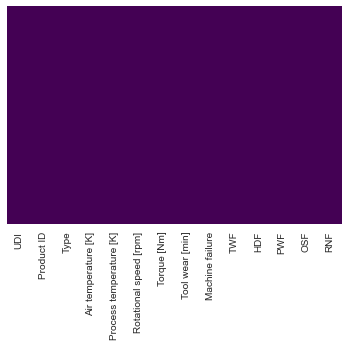

In [143]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# * After applying impute function:

In [144]:
train.loc[[9999],:]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9999,10000,M24859,M,302.0,308.7,1500,40.2,30,0,0,0,0,0,0


# RESULT :- Successful data cleaning in Dataset using EDA.

# 2.Feature Engineering:

## i) Displaying types of data in the dataset:

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## ii) Converting Categorical Features:

In [146]:
pd.get_dummies(train['Type'],drop_first=True).head

<bound method NDFrame.head of       L  M
0     0  1
1     1  0
2     1  0
3     1  0
4     1  0
...  .. ..
9995  0  1
9996  0  0
9997  0  1
9998  0  0
9999  0  1

[10000 rows x 2 columns]>

In [147]:
Type = pd.get_dummies(train['Type'],drop_first=True)

In [148]:
train.drop(['Product ID','Type','Machine failure','TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

## iii) Dropping columns not required for training model: 

In [149]:
train.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,2,298.2,308.7,1408,46.3,3
2,3,298.1,308.5,1498,49.4,5
3,4,298.2,308.6,1433,39.5,7
4,5,298.2,308.7,1408,40.0,9


In [150]:
train = pd.concat([Type],axis=1)

In [151]:
train.head()

,L,M
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


## 3. Building a Logistic Regression Model:

## i) Train Test Split:

## *Here, we will first drop the dependent features.

In [152]:
train.drop('M',axis=1).head()

,L
0,0
1,1
2,1
3,1
4,1


In [153]:
train['M'].head()

0    1
1    0
2    0
3    0
4    0
Name: M, dtype: uint8

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('M',axis=1),
                                                 train['M'],test_size=0.30,
                                                 random_state=101)

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
train.head()

,L,M
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [158]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [159]:
predictions = logmodel.predict(x_test)

In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
accuracy = confusion_matrix(y_test,predictions)

In [162]:
accuracy

array([[1765,  319],
       [   0,  916]], dtype=int64)

In [163]:
from sklearn.metrics import accuracy_score

In [164]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8936666666666667

In [165]:
predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=uint8)